In [1]:
import os
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
from corner import corner
import model_frequentist as model
import emcee
from multiprocess import Pool
from scipy import stats

In [2]:
os.environ['OMP_NUM_THREADS'] = '1'

In [3]:
theta0 = np.loadtxt('theta_star.txt')

In [4]:
scatter, capture_ground, capture_excited, capture_total = model.azr.predict(theta0, dress_up=False)

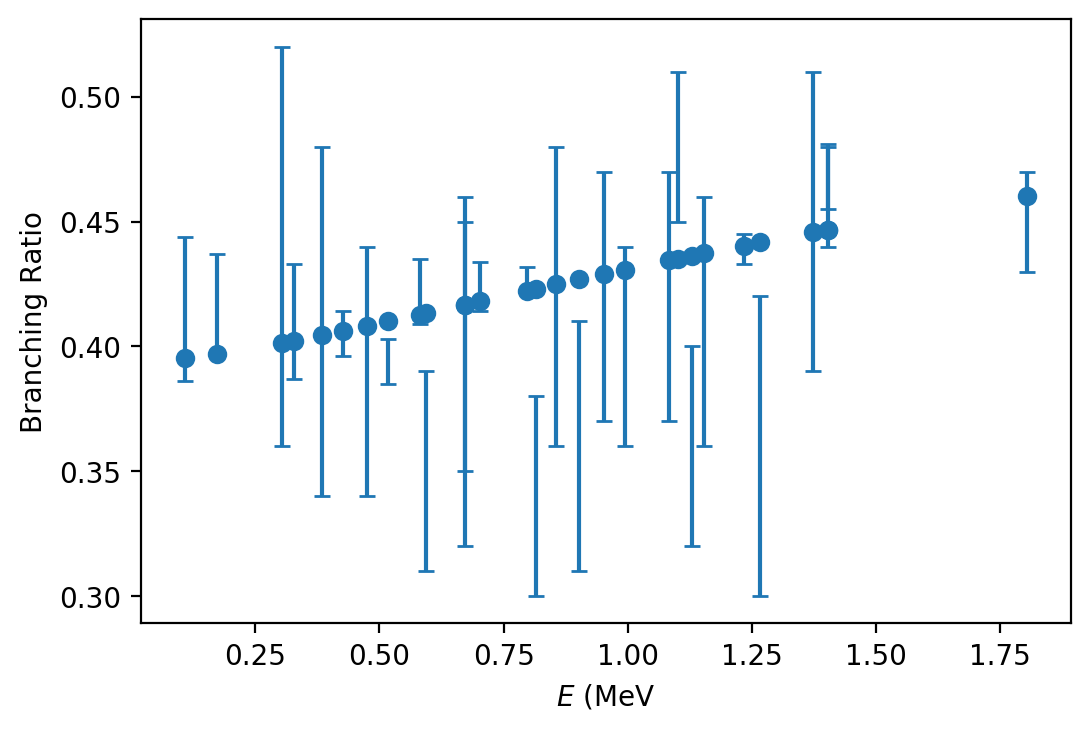

In [5]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(capture_excited[:, 0], capture_excited[:, 3] / capture_ground[:, 3])
ax.errorbar(capture_excited[:, 0], capture_excited[:, 5], yerr=capture_excited[:, 6], linestyle='', capsize=3)

ax.set_xlabel(r'$E$ (MeV')
ax.set_ylabel('Branching Ratio');

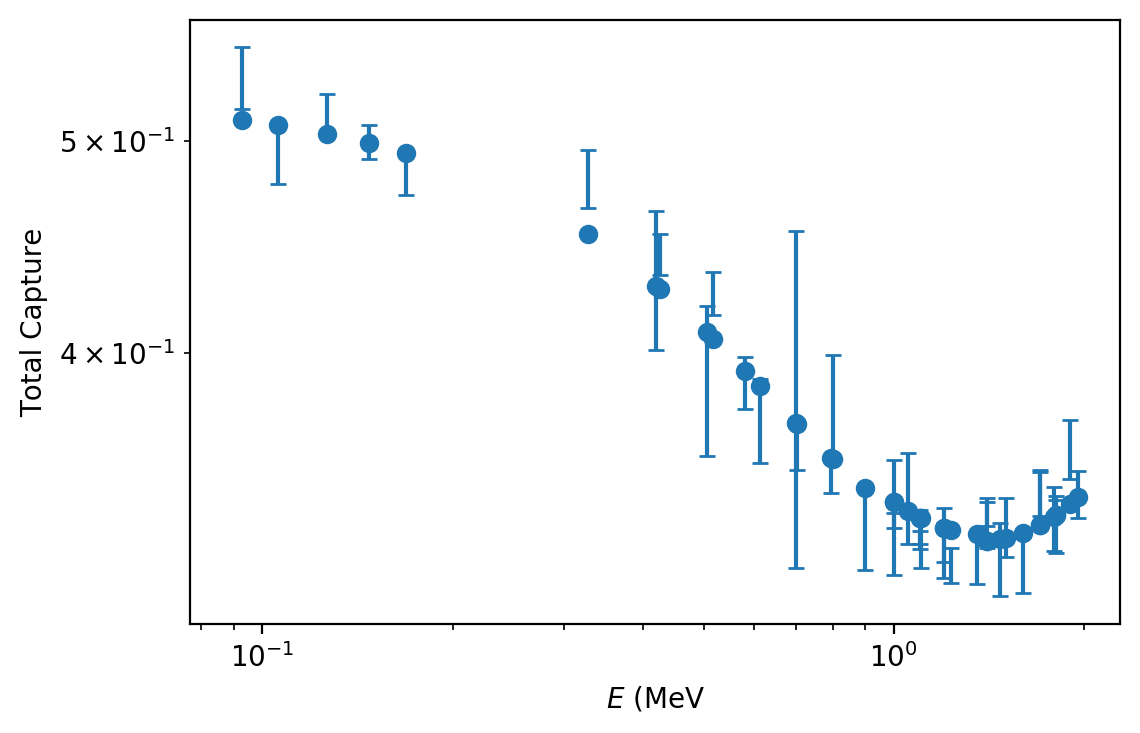

In [6]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

ax.scatter(capture_total[:, 0], 1000*capture_total[:, 4])
ax.errorbar(capture_total[:, 0], 1000*capture_total[:, 7], yerr=1000*capture_total[:, 8],
            linestyle='', capsize=3)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$E$ (MeV')
ax.set_ylabel('Total Capture');

In [7]:
model.chi_squared(theta0)

287.70727409607184

In [ ]:
result = optimize.basinhopping(model.chi_squared, theta0)

In [ ]:
result

In [ ]:
theta0